In [71]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [72]:
df = pd.read_csv("ufo_data_2.csv")
df.shape

(127884, 10)

# PART 1

#### Question: Is there a correlation between sightings for each UFO shape and when it was reported?

Morning = 6 am -> 12pm
Afternoon = 12pm -> 6 pm
Evening = 6pm -> 12am
Night = 12 am -> 6 am

In [73]:
def time_of_day(h):
    if h < 6:
        return "Night"
    elif h < 12:
        return "Morning"
    elif h < 18:
        return "Afternoon"
    else:
        return "Evening"

In [74]:
df['Time of Day'] = df['Hour'].apply(time_of_day)

In [75]:
table = df.groupby("Time of Day")["Shape of UFO"].count()
table = table.sort_values()
table

Time of Day
Morning      10783
Afternoon    15237
Night        24479
Evening      77385
Name: Shape of UFO, dtype: int64

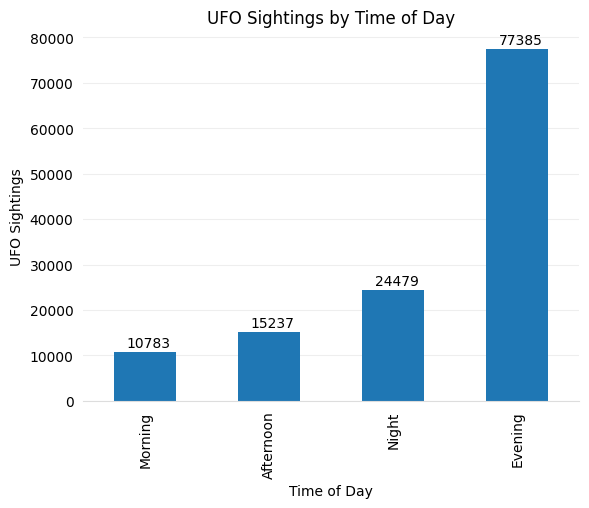

In [76]:
fig, ax = plt.subplots()
table.plot(kind = "bar")
plt.xlabel("Time of Day")
plt.ylabel('UFO Sightings')
plt.title('UFO Sightings by Time of Day')

# Add labels above each bar
for i, v in enumerate(table):
    ax.text(i - 0.15, v + 1000, str(v), color='black')
    
# adding horizontal lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
plt.show()

In [82]:
table2 = df.groupby(["Shape of UFO", "Time of Day"])["Time of Day"].size().unstack()
table2 = table2[table2.sum(axis=1) >= 2500]
table2

Time of Day,Afternoon,Evening,Morning,Night
Shape of UFO,,,,
Changing,555.0,1871.0,349.0,748.0
Cigar,916.0,1460.0,497.0,469.0
Circle,1483.0,7728.0,1182.0,2377.0
Disk,1697.0,3698.0,831.0,1477.0
Fireball,524.0,6737.0,541.0,1419.0
Formation,371.0,3008.0,284.0,775.0
Light,1344.0,17243.0,1597.0,5004.0
Orb,477.0,3356.0,371.0,898.0
Other,1498.0,4882.0,887.0,1811.0


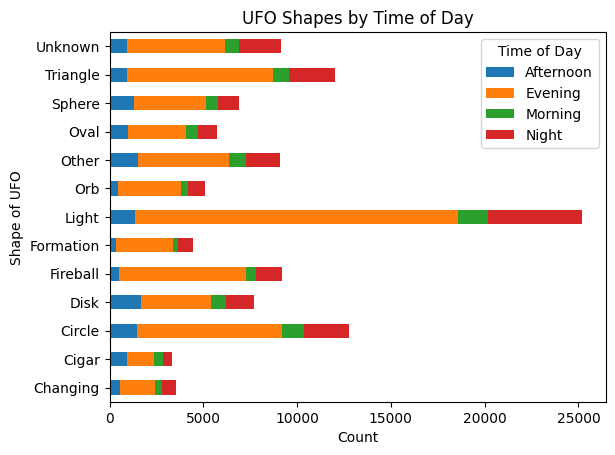

In [83]:
# let's make a stacked bar chart
table2.plot(kind='barh', stacked=True)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Shape of UFO')
plt.title('UFO Shapes by Time of Day')

# Show plot
plt.show()

# PART 2

#### Question: Is there a correlation between the time of a UFO sighting with the season it occured?

In [105]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df

,City,State,Country,Shape of UFO,Year,Month,Day,Hour,Minute,Season,Time of Day,Month Name
0,Brighton/Fairfield,IA,USA,Teardrop,2023.0,4.0,8.0,19.0,30.0,spring,Evening,Apr
1,Ocean Shores,New South Wales,Australia,Triangle,2023.0,4.0,8.0,18.0,45.0,spring,Evening,Apr
2,Southampton,MA,USA,Light,2023.0,4.0,8.0,5.0,39.0,spring,Night,Apr
3,ST BRUNO DE MONTARVILLE,Quebec,Canada,Changing,2023.0,4.0,7.0,22.0,15.0,spring,Evening,Apr
4,Bedford,VA,USA,Cube,2023.0,4.0,7.0,21.0,55.0,spring,Evening,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...
127879,Interstate-5,CA,USA,Other,2023.0,4.0,28.0,1.0,0.0,spring,Night,Apr
127880,Senji,IN,India,Flash,2021.0,6.0,22.0,1.0,0.0,summer,Night,June
127881,Kentville (Canada),NS,Canada,Light,1984.0,7.0,1.0,0.0,30.0,summer,Night,July
127882,Alabama,AL,USA,Diamond,2023.0,4.0,28.0,0.0,4.0,spring,Night,Apr


In [104]:
# I looked up on chatgpt how to order categorical columns and this is what it came with...
df['Month Name'] = pd.Categorical(df['Month Name'], categories = month, ordered = True)
# now at this point, I can graph it just like I did previously
table3 = df.groupby(["Time of Day", "Month Name"])["Time of Day"].size().unstack()
table3

Month Name,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
Time of Day,,,,,,,,,,,,
Afternoon,1285,972,933,935,1110,1698,1405,1239,1182,1398,1646,1434
Evening,4758,4349,5310,5587,5359,7032,9763,8262,7814,7323,6451,5377
Morning,900,803,822,750,699,914,803,931,1047,1343,899,872
Night,1867,1403,1477,1525,1835,2638,3123,2859,2260,2116,1851,1525


In [106]:
table3 = df.groupby(["Time of Day", "Season"])["Time of Day"].size().unstack()
table3

Season,fall,spring,summer,winter
Time of Day,,,,
Afternoon,4226,2978,4342,3691
Evening,21588,16256,25057,14484
Morning,3289,2271,2648,2575
Night,6227,4837,8620,4795


Fall count   = 35330                    
Spring count = 26342                
Summer count = 40667                
Winte count  = 25545